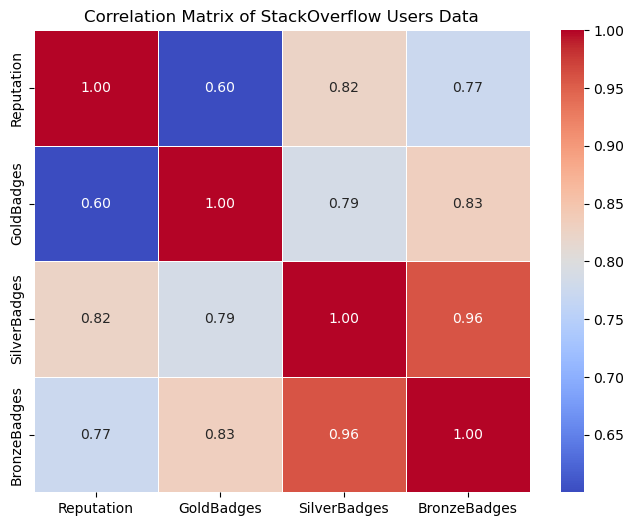

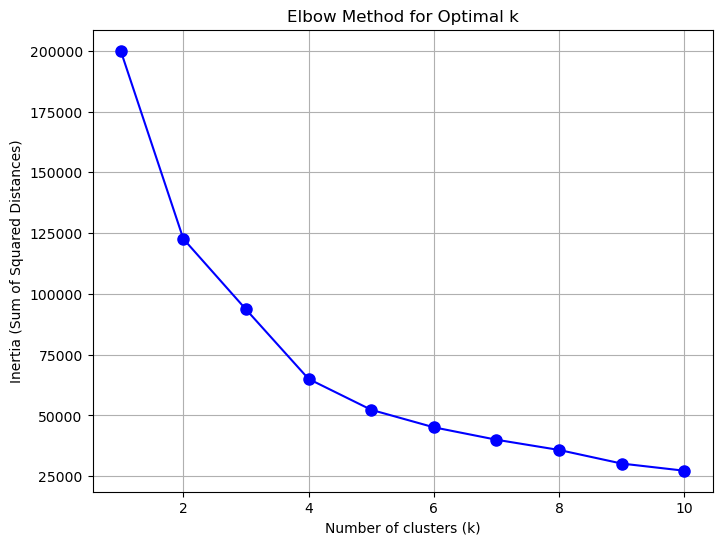

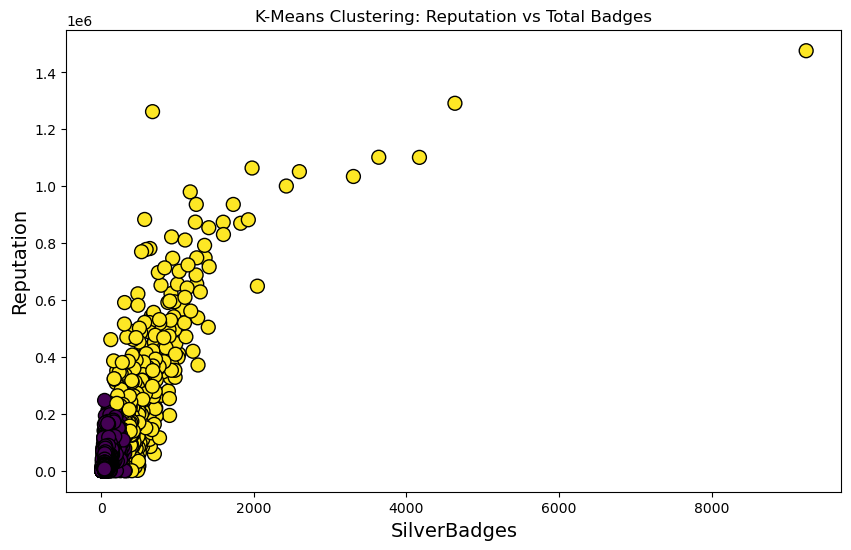

K-means output saved to C:/Users/Sandhya/Downloads/kmeans_output.csv
Accuracy: 99.99%
[[9809    1]
 [   0  190]]
Confusion Matrix:
              precision    recall  f1-score   support

    accepted       1.00      1.00      1.00      9810
not accepted       0.99      1.00      1.00       190

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

logistic regression output saved to C:/Users/Sandhya/Downloads/logistic_regression_results.csv


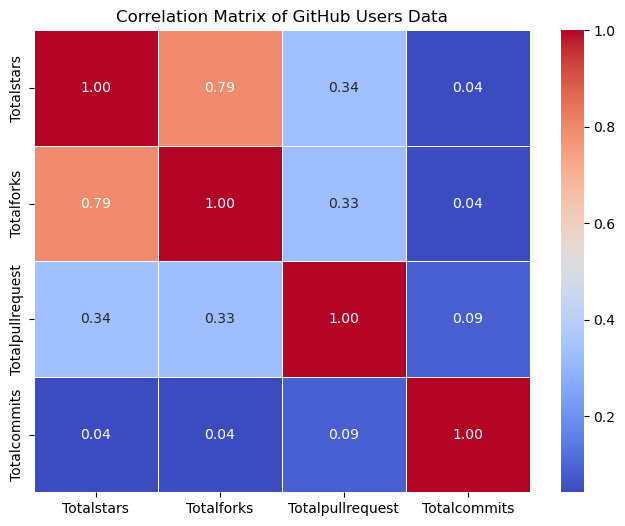

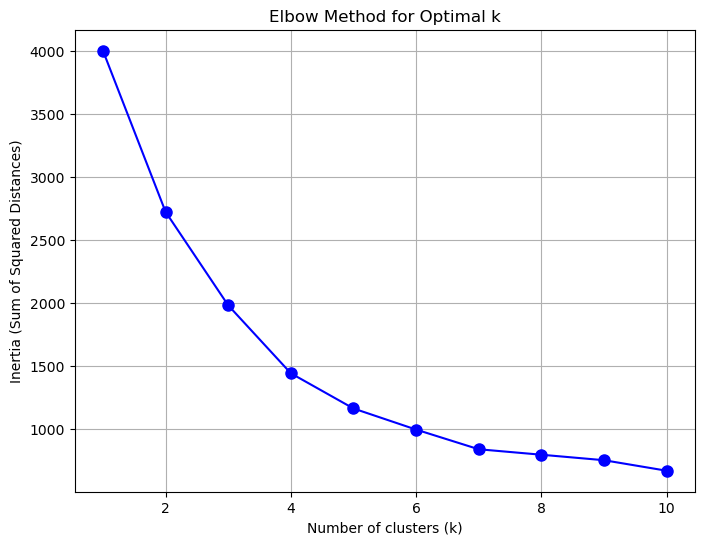

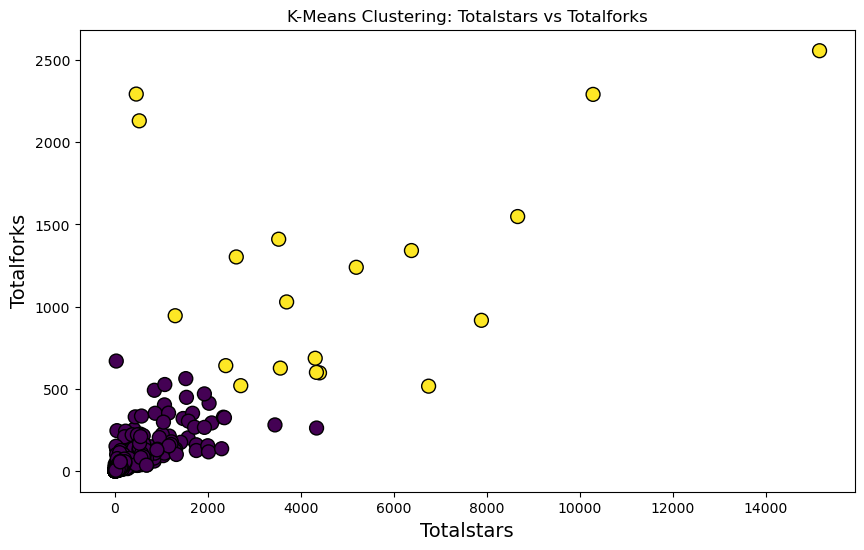

K-means output saved to C:/Users/Sandhya/Downloads/kmeans_GitHub_output.csv
Accuracy: 100.00%
[[194   0]
 [  0   6]]
Confusion Matrix:
              precision    recall  f1-score   support

    accepted       1.00      1.00      1.00       194
not accepted       1.00      1.00      1.00         6

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

logistic regression output saved to C:/Users/Sandhya/Downloads/GitHub_output.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import sqlite3
#import import sqlcipher3

# Connect to SQLite database
conn = sqlite3.connect('C:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Database/database.db')
cursor = conn.cursor()

# Connect to SQLCipher
#conn = sqlcipher3.connect('C:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Database/database.db')
#conn.execute("PRAGMA key = '1234';")

# Read the CSV file for Stackoverflow
stackoverflow = pd.read_csv('C:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Preprocessing Data/StackOverflow_users_data.csv')

# Save StackOverflow users data to SQLite database
stackoverflow.to_sql('StackOverflow_users_data', conn, if_exists='replace', index=False)

# Checking Headers of the Stackoverflow CSV file
stackoverflow.head()

# Checking the details of the columns within the file
stackoverflow.describe()

# Features of the Stackoverflow
selected_columns = stackoverflow[['Reputation', 'GoldBadges', 'SilverBadges', 'BronzeBadges']]

# Correlation matrix and HeatMap for Stackoverflow
corr_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of StackOverflow Users Data')
plt.show()

# Elbow function for identifying the optimal clusters for Stackoverflow
X = selected_columns
scaler = StandardScaler()  # Standardize the features
X_scaled = scaler.fit_transform(X)

# Apply the Elbow method
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve for Stackoverflow
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# K-Means Algorithm for Stackoverflow
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
stackoverflow['Cluster'] = kmeans.fit_predict(X_scaled)

# K-Means Plot for Stackoverflow
plt.figure(figsize=(10, 6))
plt.scatter(stackoverflow['SilverBadges'], stackoverflow['Reputation'], c=stackoverflow['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering: Reputation vs Total Badges')
plt.xlabel('SilverBadges', fontsize=14)
plt.ylabel('Reputation', fontsize=14)
plt.show()

# Save the DataFrame with the cluster labels to a CSV file
kmeans_output = 'C:/Users/Sandhya/Downloads/kmeans_output.csv'
print(f"K-means output saved to {kmeans_output}")

# Logistic Regression for Stackoverflow
kmeans_output = pd.read_csv(kmeans_output)
selected_features = kmeans_output[['Reputation', 'GoldBadges', 'SilverBadges', 'BronzeBadges']]
X = selected_features
y = kmeans_output['Cluster']
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
logreg = LogisticRegression(solver='lbfgs', max_iter=50000)
logreg.fit(X1_train, y_train)
y_pred = logreg.predict(X1_test)

# Accuracy and confusion matrix for Stackoverflow
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Confusion Matrix:")

# Predictions to the original DataFrame based on test set indices
test_indices = y_test.index  # Get the indices of the test set from y_test
kmeans_output.loc[test_indices, 'Logistic_Regression_Predictions'] = y_pred
target_names = ['accepted', 'not accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

# Save the Logistic Regression results to a CSV file
logistic_regression_results = 'C:/Users/Sandhya/Downloads/logistic_regression_results.csv'
kmeans_output.to_csv(logistic_regression_results, index=False)
print(f"logistic regression output saved to {logistic_regression_results}")

# Create table for Stackoverflow results
cursor.execute('''
    CREATE TABLE IF NOT EXISTS logistic_regression_results (
        Reputation INTEGER,
        GoldBadges INTEGER,
        SilverBadges INTEGER,
        BronzeBadges INTEGER,
        Cluster INTEGER,
        Logistic_Regression_Predictions INTEGER
    )
''')

# Insert Stackoverflow results into SQLite
kmeans_output.to_sql('logistic_regression_results', conn, if_exists='replace', index=False)
conn.commit()

###################################################################################### GitHub #####

# Read the CSV file for GitHub
Git_Hub = pd.read_csv('C:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Preprocessing Data/github_users_data.csv')

# Save GitHub users data to SQLite database
Git_Hub.to_sql('github_users_data', conn, if_exists='replace', index=False)

# Checking Headers of the GitHub CSV file
Git_Hub.head()

# Checking the details of the columns within the file
Git_Hub.describe()

# Features of the GitHub
selected_features_Git = Git_Hub[['Totalstars', 'Totalforks', 'Totalpullrequest', 'Totalcommits']]

# Correlation matrix and HeatMap for GitHub
corr_matrix = selected_features_Git.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of GitHub Users Data')
plt.show()

# Elbow function for identifying the optimal clusters for GitHub
G = selected_features_Git
scaler = StandardScaler()
G_scaled = scaler.fit_transform(G)  # Standardize the features for GitHub

k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(G_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve for GitHub
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# K-Means Algorithm for GitHub
optimal_k = 2  # Set based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
Git_Hub['Cluster'] = kmeans.fit_predict(G_scaled)

# K-Means Plot for GitHub
plt.figure(figsize=(10, 6))
plt.scatter(Git_Hub['Totalstars'], Git_Hub['Totalforks'], c=Git_Hub['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering: Totalstars vs Totalforks')
plt.xlabel('Totalstars', fontsize=14)
plt.ylabel('Totalforks', fontsize=14)
plt.show()

# Save the DataFrame with the cluster labels to a CSV file
kmeans_GitHub_output = 'C:/Users/Sandhya/Downloads/kmeans_GitHub_output.csv'
Git_Hub.to_csv(kmeans_GitHub_output, index=False)
print(f"K-means output saved to {kmeans_GitHub_output}")

# Logistic Regression for GitHub
kmeans_GitHub_output = pd.read_csv(kmeans_GitHub_output)
features_GitHub = kmeans_GitHub_output[['Totalstars', 'Totalforks', 'Totalpullrequest', 'Totalcommits']]
A = features_GitHub
b = kmeans_GitHub_output['Cluster']
scaler = StandardScaler()
A1 = scaler.fit_transform(A)
A1_train, A1_test, b_train, b_test = train_test_split(A1, b, test_size=0.20, random_state=42)
logreg = LogisticRegression(solver='lbfgs', max_iter=2000)
logreg.fit(A1_train, b_train)
b_pred = logreg.predict(A1_test)
accuracy = accuracy_score(b_test, b_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_matrix = confusion_matrix(b_test, b_pred)
print(conf_matrix)
print("Confusion Matrix:")

# Accuracy and confusion matrix for GitHub
test_indices = b_test.index
kmeans_GitHub_output.loc[test_indices, 'Logistic_Regression_Predictions_GitHub'] = b_pred

# Print Classification Matrix
target_names = ['accepted', 'not accepted']
print(classification_report(b_test, b_pred, target_names=target_names))

# Save Logistic Regression results to a CSV file
GitHub_output = 'C:/Users/Sandhya/Downloads/GitHub_output.csv'
kmeans_GitHub_output.to_csv(GitHub_output, index=False)
print(f"logistic regression output saved to {GitHub_output}")

# Create table for GitHub results
cursor.execute('''
    CREATE TABLE IF NOT EXISTS GitHub_output (
        Totalstars INTEGER,
        Totalforks INTEGER,
        Totalpullrequest INTEGER,
        Totalcommits INTEGER,
        Cluster INTEGER,
        Logistic_Regression_Predictions_GitHub INTEGER
    )
''')

# Insert GitHub results into SQLite
kmeans_GitHub_output.to_sql('GitHub_output', conn, if_exists='replace', index=False)


##################question bank and requesrt
# Read the CSV file for Question_Bank
Questionbank = pd.read_excel('c:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Question_Bank/Python_Question_Bank.xlsx')
# Save Question_Bank data to SQLite database
Questionbank.to_sql('Question_Bank', conn, if_exists='replace', index=False)


# Read the CSV file for Answer_Bank
Response_file = pd.read_csv('C:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Question_Bank/Response.csv')
# Save Response_Bank data to SQLite database
Response_file.to_sql('Response_file', conn, if_exists='replace', index=False)

# Read the CSV file for candidate
candidate = pd.read_csv('C:/Users/Sandhya/OneDrive/Desktop/Py_Proj_Resources/Selection Algorithm/Selected_Candidate_List\candidates.csv')
# Save Response_Bank data to SQLite database
candidate.to_sql('accepted_candidates', conn, if_exists='replace', index=False)

conn.commit()

# Close the database connection
conn.close()

